In [1]:
import os.path
import icecube_load_gnssr

# path can be a list of paths if you like, or use globbing if you are only looking for certain date range, etc.
PATH_TO_DATA_DIR = os.path.join('/volstore', 'spacebridge', 'gnssr_grzice', 'data','*2020-12-01*.nc')

# choose a number of parallel processes appropriate for your set up
PARALLEL_LOADS = 10

load_class = icecube_load_gnssr.LoadGNSSR(path_to_dir=PATH_TO_DATA_DIR, multi_processing=PARALLEL_LOADS)

In [2]:
# load in all the data!
load_class.collect_tracks()

[ 2022-05-03 09:29:18.886 ] INFO icecube_load_gnssr - collect_tracks: Loading data from 371 files
[ 2022-05-03 09:29:23.684 ] INFO icecube_load_gnssr - collect_tracks: Data Loaded


/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarn

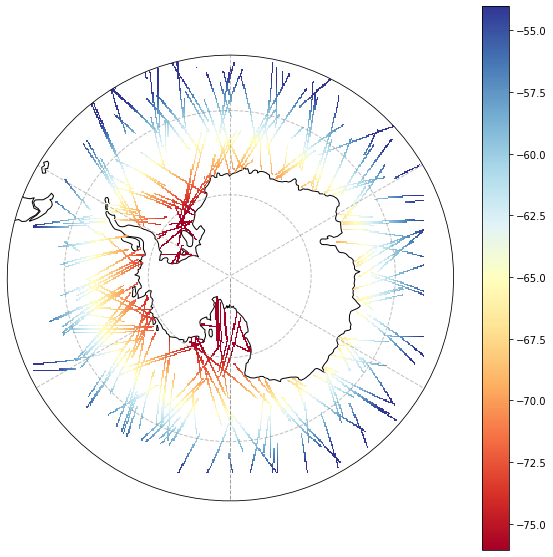

In [4]:

# plot a gridded map of the latitudes (sorry about the warnings...)
out = load_class.gridstereo('latitude', inds=load_class.data['latitude'] < 0, make_fig=True)
lat_grid, lon_grid, data_grid, mapping_axis = out

[ 2022-05-03 09:29:46.632 ] INFO icecube_load_gnssr - gridstereo: removing 3815 -999s and nans
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jc1n15/venv/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline

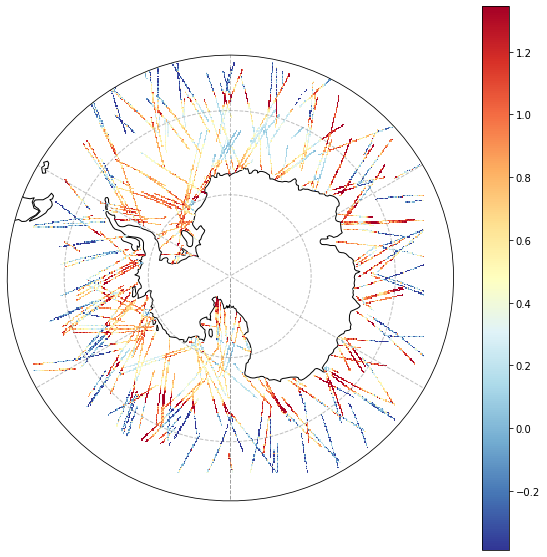

In [5]:
_ = load_class.gridstereo('excess_phase_noise', grid=25, cmap='RdYlBu_r', make_fig=True)


In [6]:
print(f'Loaded from {os.path.basename(load_class.data["files_read"][0])} to {os.path.basename(load_class.data["files_read"][-1])}')

Loaded from spire_gnss-r_L2_grzIce_v07.00_2020-12-01T00-02-30_FM122_G24.nc to spire_gnss-r_L2_grzIce_v07.00_2020-12-01T23-54-12_FM120_G17.nc
